(h: 2048, w: 1365, c: 3)


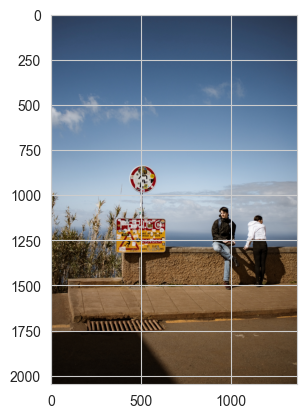

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = './IMG_5516.jpg'
image_as_array = mpimg.imread(image)
(h,w,c) = image_as_array.shape
print(f'(h: {h}, w: {w}, c: {c})')
image_as_array2d = image_as_array.reshape(h*w,c)
plt.imshow(image_as_array)

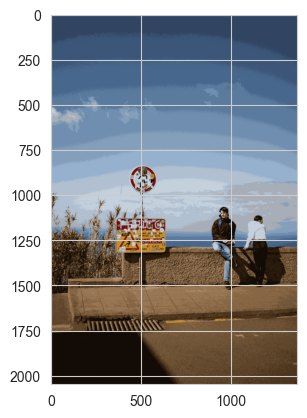

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20)
labels = model.fit_predict(image_as_array2d)
rgb_codes = model.cluster_centers_.round(0).astype(int)
quantizd_image = np.reshape(rgb_codes[labels],(h,w,c))
plt.imshow(quantizd_image)


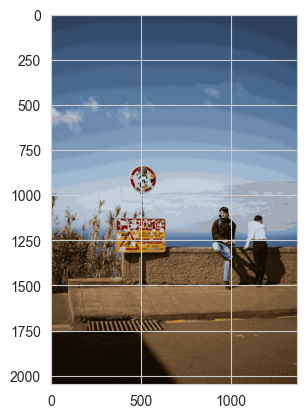

In [26]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=25)
labels = model.fit_predict(image_as_array2d)
rgb_codes = model.cluster_centers_.round(0).astype(int)
quantizd_image = np.reshape(rgb_codes[labels],(h,w,c))
plt.imshow(quantizd_image)


In [32]:
model.fit_predict(image_as_array2d)

array([ 0,  0,  0, ..., 15, 15, 15])

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
class ImageTransformer(object):
    @staticmethod
    def transform(image_as_array, n_clusters):
        (h,w,c) = image_as_array.shape
        print(f'Image parameters: (h: {h}, w: {w}, c: {c})')
        image_as_array2d = image_as_array.reshape(h*w,c)
        model = MiniBatchKMeans(n_clusters=n_clusters)
        labels = model.fit_predict(image_as_array2d)
        rgb_codes = model.cluster_centers_.round(0).astype(np.uint8)
        quantizd_image = np.reshape(rgb_codes[labels],(h,w,c))
        plt.imshow(quantizd_image)
        return quantizd_image

In [134]:
transformer = ImageTransformer()

Image parameters: (h: 2048, w: 1365, c: 3)


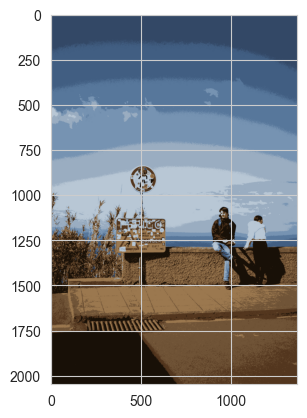

In [135]:
transformer.transform(image_as_array,10);

Image parameters: (h: 1365, w: 2048, c: 3)


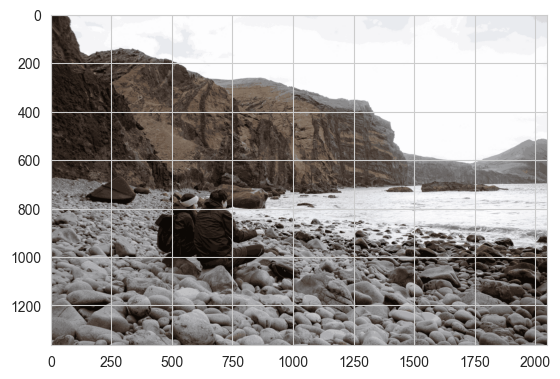

In [136]:
other_image = mpimg.imread('./IMG_6311.jpg')
transformer.transform(other_image,20);

In [137]:
import joblib
joblib.dump(ImageTransformer,'image_transformer.pkl')

['image_transformer.pkl']

In [138]:
saved_model = joblib.load('./image_transformer.pkl')

Image parameters: (h: 2048, w: 1365, c: 3)


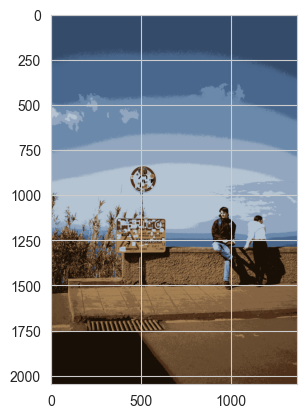

In [139]:
img = saved_model().transform(mpimg.imread('./IMG_5516.jpg'),10)
plt.imsave('saved_img.jpg',img)
